In [1]:
import sys
sys.path.append('../..')
from lib_train import *
%matplotlib inline

X_train, y_train = load_audio_datafiles(conf, 'X_train.npy', 'y_train.npy', normalize=True)
X_test, y_test = load_audio_datafiles(conf, 'X_test.npy', 'y_test.npy', normalize=True)
print('Loaded train:test = %d:%d samples.' % (len(X_train), len(X_test)))

{'sampling_rate': 16000, 'duration': 1, 'hop_length': 253, 'fmin': 20, 'fmax': 8000, 'n_mels': 64, 'n_fft': 1280, 'labels': ['AfricanPiedWagtail', 'BarnSwallow', 'BlackWoodpecker', 'BlackheadedGull', 'CanadaGoose', 'CarrionCrow', 'CoalTit', 'CommonBlackbird', 'CommonChaffinch', 'CommonChiffchaff', 'CommonCuckoo', 'CommonHouseMartin', 'CommonLinnet', 'CommonMoorhen', 'CommonNightingale', 'CommonPheasant', 'CommonRedpoll', 'CommonRedshank', 'CommonRedstart', 'CommonReedBunting', 'CommonSnipe', 'CommonStarling', 'CommonSwift', 'CommonWhitethroat', 'CommonWoodPigeon', 'CornBunting', 'Dunlin', 'Dunnock', 'EurasianBlackcap', 'EurasianBlueTit', 'EurasianBullfinch', 'EurasianCollaredDove', 'EurasianCoot', 'EurasianGreenfinch', 'EurasianJay', 'EurasianMagpie', 'EurasianNuthatch', 'EurasianOystercatcher', 'EurasianReedWarbler', 'EurasianSkylark', 'EurasianTreeSparrow', 'EurasianTreecreeper', 'EurasianWren', 'EurasianWryneck', 'EuropeanBeeEater', 'EuropeanGoldenPlover', 'EuropeanGoldfinch', 'Euro

Using TensorFlow backend.


 normalize samplewise
 normalize samplewise
Loaded train:test = 6336:1584 samples.


In [2]:
import keras.backend as K
K.clear_session()

conf.best_weight_file = 'model_alexbased_on_fsd.h5'
conf.epochs = 200
conf.model = 'alexnet'
conf.batch_size = conf.num_classes * 2
conf.data_balancing = 'by_generator'
history, model = train_classifier(conf, fold=0,
                                  dataset=[X_train, y_train], 
                                  model=None, 
                                  init_weights='../../model/alexbased_small_fsd2018_41cls.h5')
evaluate_model(conf, model, X_test, y_test) 
print('___ training finished ___')

----- Fold #0 ----
 Dataset is not balanced so far, conf.data_balancing = by_generator
 Using normal data generator, with class balancing
 train_steps_per_epoch, 29
Model: AlexNet based
Loading weights: ../../model/alexbased_small_fsd2018_41cls.h5
Epoch 1/200
 - 11s - loss: 4.6325 - acc: 0.0118 - val_loss: 4.5004 - val_acc: 0.0103

Epoch 00001: val_loss improved from inf to 4.50037, saving model to model_alexbased_on_fsd.h5
Epoch 2/200
 - 10s - loss: 4.5473 - acc: 0.0206 - val_loss: 4.3938 - val_acc: 0.0300

Epoch 00002: val_loss improved from 4.50037 to 4.39380, saving model to model_alexbased_on_fsd.h5
Epoch 3/200
 - 10s - loss: 4.4699 - acc: 0.0241 - val_loss: 4.3187 - val_acc: 0.0450

Epoch 00003: val_loss improved from 4.39380 to 4.31870, saving model to model_alexbased_on_fsd.h5
Epoch 4/200
 - 11s - loss: 4.3982 - acc: 0.0355 - val_loss: 4.2439 - val_acc: 0.0820

Epoch 00004: val_loss improved from 4.31870 to 4.24387, saving model to model_alexbased_on_fsd.h5
Epoch 5/200
 - 10s -

 - 10s - loss: 2.0854 - acc: 0.5288 - val_loss: 1.3025 - val_acc: 0.7208

Epoch 00045: val_loss improved from 1.31381 to 1.30248, saving model to model_alexbased_on_fsd.h5
Epoch 46/200
 - 10s - loss: 2.0470 - acc: 0.5482 - val_loss: 1.1890 - val_acc: 0.7563

Epoch 00046: val_loss improved from 1.30248 to 1.18897, saving model to model_alexbased_on_fsd.h5
Epoch 47/200
 - 10s - loss: 2.1554 - acc: 0.5157 - val_loss: 1.1736 - val_acc: 0.7571

Epoch 00047: val_loss improved from 1.18897 to 1.17358, saving model to model_alexbased_on_fsd.h5
Epoch 48/200
 - 10s - loss: 2.0522 - acc: 0.5361 - val_loss: 1.2351 - val_acc: 0.7319

Epoch 00048: val_loss did not improve from 1.17358
Epoch 49/200
 - 10s - loss: 1.9942 - acc: 0.5519 - val_loss: 1.1062 - val_acc: 0.7626

Epoch 00049: val_loss improved from 1.17358 to 1.10616, saving model to model_alexbased_on_fsd.h5
Epoch 50/200
 - 10s - loss: 2.0871 - acc: 0.5402 - val_loss: 1.0762 - val_acc: 0.7784

Epoch 00050: val_loss improved from 1.10616 to 1

 - 10s - loss: 1.3436 - acc: 0.7259 - val_loss: 0.5543 - val_acc: 0.8904

Epoch 00098: val_loss did not improve from 0.52102
Epoch 99/200
 - 10s - loss: 1.4269 - acc: 0.6626 - val_loss: 0.5948 - val_acc: 0.8849

Epoch 00099: val_loss did not improve from 0.52102
Epoch 100/200
 - 10s - loss: 1.3109 - acc: 0.7188 - val_loss: 0.5774 - val_acc: 0.8856

Epoch 00100: val_loss did not improve from 0.52102
Epoch 101/200
 - 10s - loss: 1.2194 - acc: 0.7408 - val_loss: 0.5008 - val_acc: 0.9038

Epoch 00101: val_loss improved from 0.52102 to 0.50080, saving model to model_alexbased_on_fsd.h5
Epoch 102/200
 - 10s - loss: 1.1579 - acc: 0.7667 - val_loss: 0.5346 - val_acc: 0.8943

Epoch 00102: val_loss did not improve from 0.50080
Epoch 103/200
 - 10s - loss: 1.2637 - acc: 0.7363 - val_loss: 0.5983 - val_acc: 0.8864

Epoch 00103: val_loss did not improve from 0.50080
Epoch 104/200
 - 10s - loss: 1.2798 - acc: 0.7220 - val_loss: 0.6624 - val_acc: 0.8628

Epoch 00104: val_loss did not improve from 0.5


Epoch 00155: val_loss did not improve from 0.41639
Epoch 156/200
 - 10s - loss: 1.0736 - acc: 0.7547 - val_loss: 0.5000 - val_acc: 0.9093

Epoch 00156: val_loss did not improve from 0.41639
Epoch 157/200
 - 10s - loss: 1.0226 - acc: 0.7710 - val_loss: 0.4220 - val_acc: 0.9219

Epoch 00157: val_loss did not improve from 0.41639
Epoch 158/200
 - 10s - loss: 1.0784 - acc: 0.7782 - val_loss: 0.4175 - val_acc: 0.9290

Epoch 00158: val_loss did not improve from 0.41639
Epoch 159/200
 - 10s - loss: 0.8999 - acc: 0.8468 - val_loss: 0.3758 - val_acc: 0.9345

Epoch 00159: val_loss improved from 0.41639 to 0.37578, saving model to model_alexbased_on_fsd.h5
Epoch 160/200
 - 10s - loss: 1.0540 - acc: 0.7680 - val_loss: 0.4337 - val_acc: 0.9211

Epoch 00160: val_loss did not improve from 0.37578
Epoch 161/200
 - 10s - loss: 1.0395 - acc: 0.7590 - val_loss: 0.4499 - val_acc: 0.9251

Epoch 00161: val_loss did not improve from 0.37578
Epoch 162/200
 - 10s - loss: 0.9717 - acc: 0.7757 - val_loss: 0.416

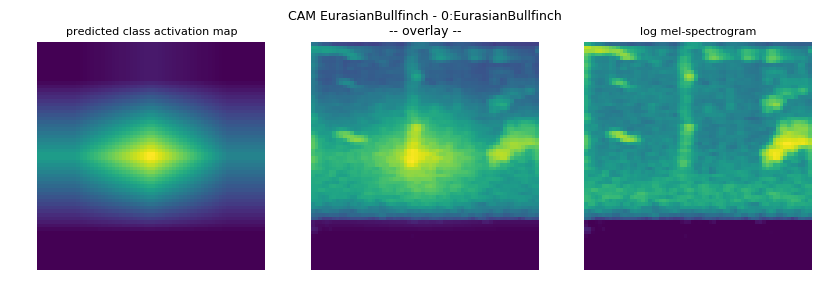

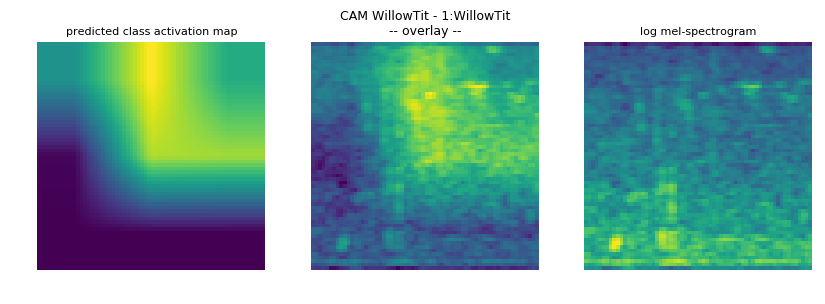

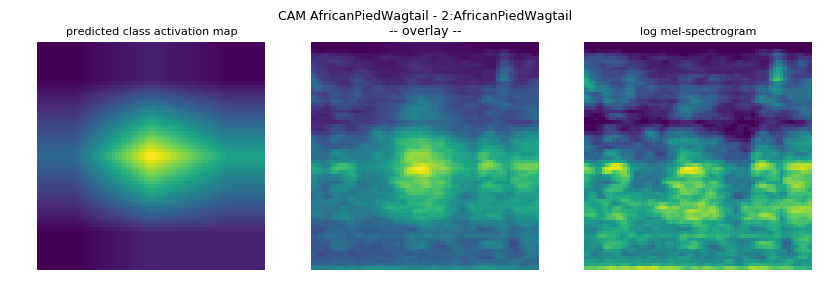

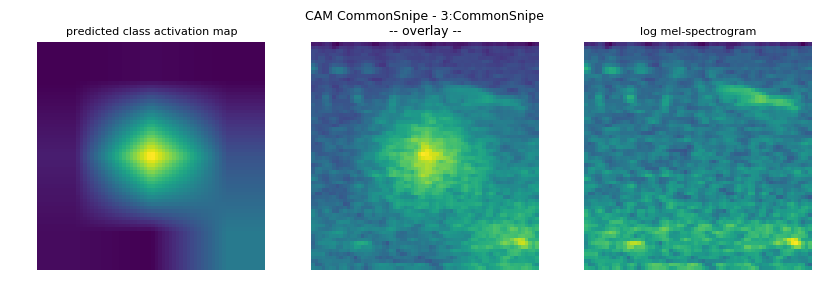

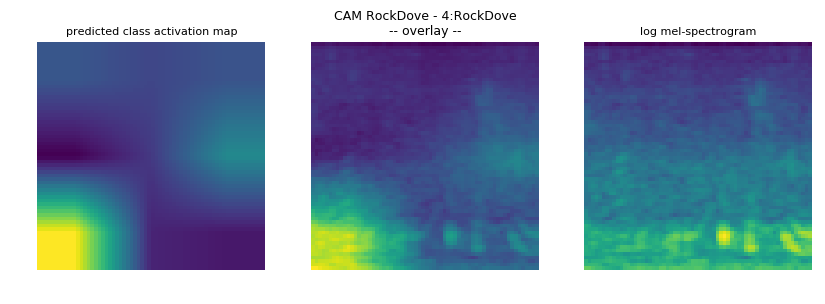

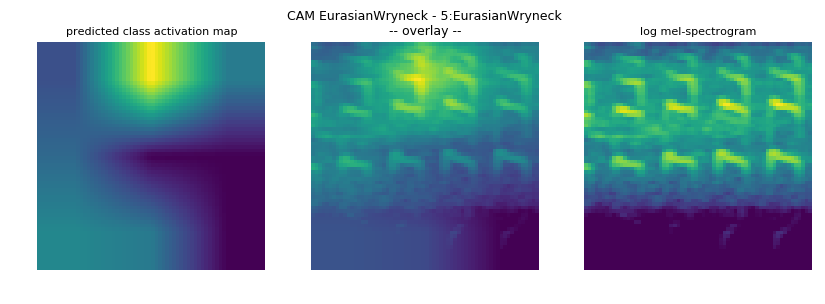

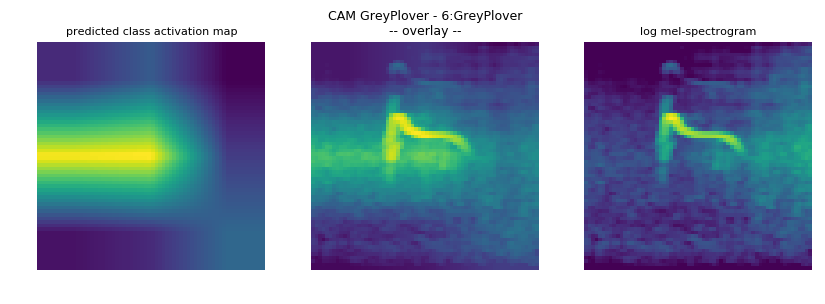

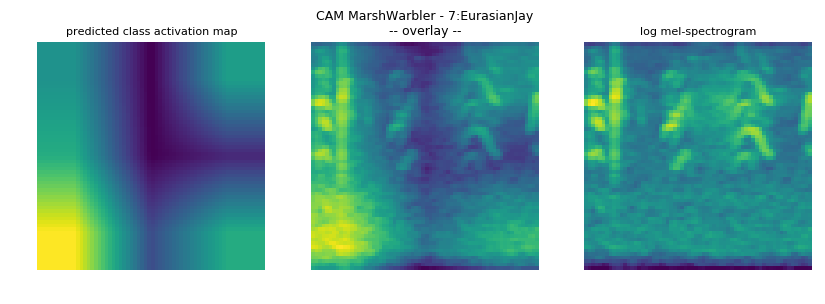

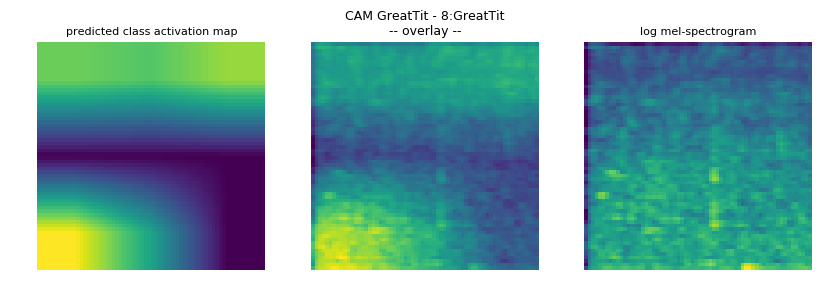

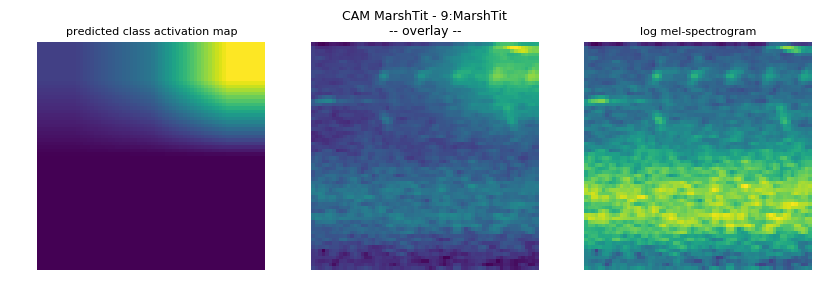

In [5]:
from visualize import visualize_cam_audio

model.load_weights('model_alexbased_on_fsd.h5')
offset = 200
for i, x in enumerate(X_train[offset:offset+10]):
    visualize_cam_audio(conf, model, x, '{}:{}'.format(i, conf.labels[np.argmax(y_train[offset + i])]),
                  layer='last_conv')